# Classification Model (PDAN8411_Task2)

## Classification model and model usage/application

The classification model chosen for this task will be the Naïve Bayes Classification model. This model is a probabilistic machine learning algorithm model based on the Bayes Theorem (of which the Bayes’ Theorem is a simple mathematical formula used for calculating conditional probabilities), which is used in a wide variety of classification tasks.

One of the Bayes classifiers is the Gaussian Naïve Bayes Classifier, this refers to continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution (Normal distribution). This will be demonstrated later in the document when the model is 

That said, I will create a binary classification model and test how well it can classify (predict y) based on a set of variables (x)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Importing the dataset

df = pd.read_excel('logistic.xlsx')

## Dataset Checks/Exploration (EDA)

In [3]:
df.info()

#Using this function allows me to evaluate the dataset to the extent of knowing the data types of each column, look for any null values in the dataset
#and gather the amount of rows in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      466 non-null    float64
 1   x2      466 non-null    float64
 2   x3      466 non-null    float64
 3   x4      466 non-null    float64
 4   x5      466 non-null    int64  
 5   x6      466 non-null    int64  
 6   x7      466 non-null    float64
 7   x8      466 non-null    float64
 8   x9      466 non-null    float64
 9   x10     466 non-null    float64
 10  y       466 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 40.2 KB


In [4]:
df.head()

#Checking the first few rows (5) of the dataset to makse sure that it is loaded correctly. 

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.0,0.605,96.2,2.0459,5,403,14.7,369.30,3.70,50.0,1
1,0.0,0.871,100.0,1.3216,5,403,14.7,396.90,26.82,13.4,1
2,0.0,0.740,100.0,1.9784,24,666,20.2,386.73,18.85,15.4,1
3,30.0,0.428,7.8,7.0355,6,300,16.6,374.71,5.19,23.7,0
4,0.0,0.488,92.2,2.7006,3,193,17.8,394.12,4.82,37.9,0


In [5]:
print(df.duplicated().sum())

#Checking for duplictions within the dataset, the function returns a boolean True and False. Ideally dupocations aren't desired as they might compromise the validity of a model.

0


<Axes: xlabel='y'>

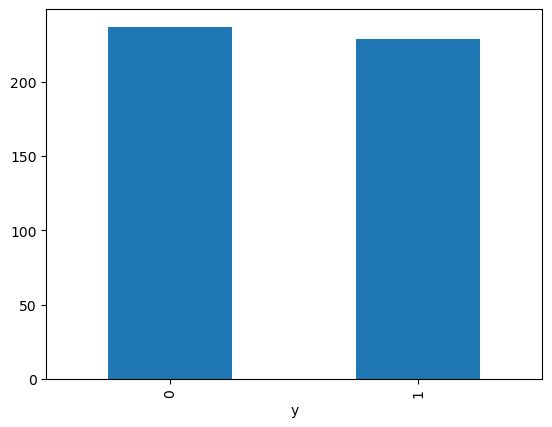

In [7]:
df['y'].value_counts().plot.bar()

#Exploring the class distribution

In [8]:
X = df[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']]
y = df['y']

#Declaring the x and the y values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#Splitting the training and testing data.

In [11]:
X_train.shape, X_test.shape

((326, 10), (140, 10))

In [12]:
NVB = GaussianNB()

In [13]:
NVB.fit(X_train, y_train)

#Fitting the model

GaussianNB()

# Model and Model Evaluation

In [14]:
y_pred_NVB = NVB.predict(X_test)

print(classification_report(y_test, y_pred_NVB))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82        79
           1       0.82      0.66      0.73        61

    accuracy                           0.79       140
   macro avg       0.79      0.77      0.78       140
weighted avg       0.79      0.79      0.78       140



[[70  9]
 [21 40]]


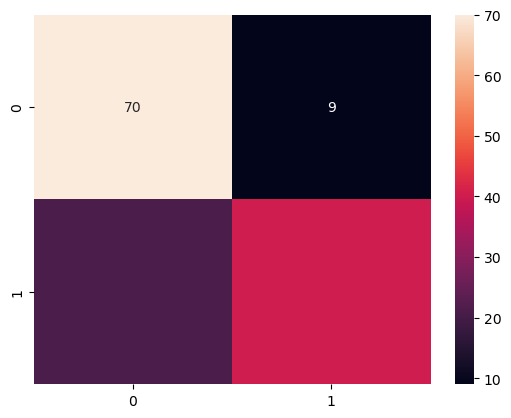

In [15]:
cm = confusion_matrix(y_test, y_pred_NVB)
sns.heatmap(cm, annot = True)
print(cm)



The above dipiction represents the True positive (70) the classifier predicted true with the correct class actually being true, the False positive (9) the classifier predicted true with the correct class actually being false this in known as a type 1 error, True negagtive (21) the classifier predicted false with the correct class actually being false , and the False negative (40) the classifier predicted false with the correct class actually being true, this is known as a type 2 error.

## KNN

In [16]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred_KNN = KNN.predict(X_test)
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        79
           1       0.86      0.90      0.88        61

    accuracy                           0.89       140
   macro avg       0.89      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140



The accusracy score of the KNN is actually much better than that of the naive bayes model although the KNN uses the nearest data points though weighted to make a classification.

The classification of the naive bayes can be improved by increasing the test sample as seen below...

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

#Splitting the training and testing data.

In [20]:
X_train.shape, X_test.shape

((279, 10), (187, 10))

In [21]:
NVB = GaussianNB()
NVB.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred_NVB = NVB.predict(X_test)

print(classification_report(y_test, y_pred_NVB))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       108
           1       0.82      0.67      0.74        79

    accuracy                           0.80       187
   macro avg       0.80      0.78      0.79       187
weighted avg       0.80      0.80      0.79       187



As seen above, the accuracy score of the model went up when the test size was increased, this is just one of the many ways the classifier model can be improved.